# DNA_construct Introduction
DNA_construct is a flexible way to indicate a DNA sequence.

A DNA sequence is composed of a string of nucleotides. The sequence of these nucleotides can allow binding of other biomolecules such as proteins or RNA. We choose to annotate known binding interactions and other features of DNA sequences by considering them to be "DNA parts". a "part" has a certain function, and the order and orientation of parts on a dna sequence describes the overall function of that DNA sequence.

For example, a `Promoter` is a part which binds to RNA polymerase and causes everything downstream to be transcribed into RNA. A `Terminator`, then, is a sequence which stops the transcription of DNA into RNA. Therefore, anything between a `Promoter` and a `Terminator` gets turned into RNA.

Other parts such as a Ribosome Binding Site or `RBS`, binds to the ribosome, but only if it is made of RNA and not DNA. Thus, an `RBS` is _like_ a `Promoter`, but instead of RNA it makes Protein. As always the position and orientation of parts determines what those parts actually do. If your sequence contains a Coding Sequence (`CDS`) _before_ an `RBS`, then the ribosome actually cannot translate that protein. Likewise if your `RBS` is after a `Terminator`, that `RBS` never gets turned into RNA.

This type of logic is incorporated into `DNA_construct`.

The basic workflow is to first define a list of parts, then string them together into a `DNA_construct`

In [1]:
from biocrnpyler import *
import numpy as np
try:
    #dnaplotlib is a cool library for plotting DNAs.
    #please use my fork located at https://github.com/dr3y/dnaplotlib
    #to install it type: pip install git+git://github.com/dr3y/dnaplotlib.git@master
    import dnaplotlib as dpl
    dpl_enabled = True
except (ModuleNotFoundError,ImportError) as e:
    dpl_enabled = False
%matplotlib inline
print("imports done!")

#part definitions below

ptet = RegulatedPromoter("ptet",["tetr"],leak=True) #this is a repressible promoter
pconst = Promoter("pconst") #constitutive promoter
utr1 = RBS("UTR1") #regular UTR
gfp = CDS("GFP","GFP") #a CDS has a name and a protein name. so this one is called GFP and the protein is also called GFP
fusrfp = CDS("fusRFP","RFP",no_stop_codons=["forward"]) #you can say that a protein has no stop codon. This is a little different from a fusion protein, because in this case you are saying that the ribosome reads through two proteins but still produces two distinct proteins, rather than one fused protein. This can happen in the case of the ta peptide which causes a peptide bond not to be formed while making a protein.
rfp = CDS("RFP","RFP") #regular RFP
t16 = Terminator("t16") #a terminator stops transcription


#now that the parts are defined, we can put together our construct.
construct_1 = DNA_construct([[pconst,"forward"],[utr1,"forward"],[gfp,"forward"],[t16,"forward"]])
construct_2 = DNA_construct([[t16,"reverse"],[rfp,"reverse"],[utr1,"reverse"],[pconst,"reverse"]])
#now, we are using dnaplotlib to plot the constructs


if(dpl_enabled):
    plotConstruct(construct_1,debug=False,plot_rnas=True)
    plotConstruct(construct_2,debug=False,plot_rnas=True)
print(construct_1)
print(construct_2)

#some very basic parameters are defined
parameters={"cooperativity":2,"kb":100, "ku":10, "ktx":.05, "ktl":.2, "kdeg":2,"kint":.05}

components = [construct_1,construct_2]
myMixture = TxTlExtract(name = "txtl", parameters = parameters, components = components, parameter_warnings = False)
myCRN = myMixture.compile_crn()


imports done!
dna = pconst_UTR1_GFP_t16
	pconst_0
	rna = UTR1_GFP_t16
	UTR1_0
	protein = GFP_1
dna = t16_r_RFP_r_UTR1_r_pconst_r
	pconst_3_r
	rna = UTR1_RFP_t16
	UTR1_0
	protein = RFP_1


You can see that for the first construct, your DNA is given an automatic name: `pconst_UTR1_GFP_t16`. 

The RNA made from your DNA is also given an automatic name: `UTR1_GFP_t16`

Likewise for the second construct, which I've made in reverse to make the difference more apparent. Though you'll see that the RNA from the second construct is still produced in the right orientation, so the RNA is shown in the forwards direction.

This is because DNA and RNA are now represented as an OrderedComplexSpecies. Each member of the OrderedComplexSpecies represents a part. So, in the case of promoters or RBSes, you'll see ribosomes and polymerases bind directly to the part inside the OrderedComplexSpecies.

Loading BokehJS ...

D:\anaconda3\lib\site-packages\bokeh\models\graphs.py:164: UserWarning: Node keys in 'layout_function' don't match node keys in the graph. These nodes may not be displayed correctly.
  warn("Node keys in 'layout_function' don't match node keys in the graph. "


Species = dna_pconst_UTR1_GFP_t16, ordered_complex_UTR1_protein_Ribo_GFP_t16_UTR1_GFP_t16, dna_t16_r_RFP_r_UTR1_r_pconst_r, protein_Ribo, rna_UTR1_GFP_t16_UTR1_GFP_t16, rna_UTR1_RFP_t16_UTR1_RFP_t16, protein_RNAP, protein_RNAase, ordered_complex_UTR1_protein_Ribo_RFP_t16_UTR1_RFP_t16, ordered_complex_dna_t16_dna_RFP_dna_UTR1_dna_pconst_protein_RNAP_dna_t16_r_RFP_r_UTR1_r_pconst_r, protein_RFP, protein_GFP, ordered_complex_dna_pconst_protein_RNAP_dna_UTR1_dna_GFP_dna_t16_dna_pconst_UTR1_GFP_t16
Reactions = [
	dna_pconst_UTR1_GFP_t16 + protein_RNAP <--> ordered_complex_dna_pconst_protein_RNAP_dna_UTR1_dna_GFP_dna_t16_dna_pconst_UTR1_GFP_t16        massaction: k_f(dna_pconst_UTR1_GFP_t16,protein_RNAP)=100*dna_pconst_UTR1_GFP_t16*protein_RNAP k_r(ordered_complex_dna_pconst_protein_RNAP_dna_UTR1_dna_GFP_dna_t16_dna_pconst_UTR1_GFP_t16)=10*ordered_complex_dna_pconst_protein_RNAP_dna_UTR1_dna_GFP_dna_t16_dna_pconst_UTR1_GFP_t16
	ordered_complex_dna_pconst_protein_RNAP_dna_UTR1_dna_GFP_dna_t16

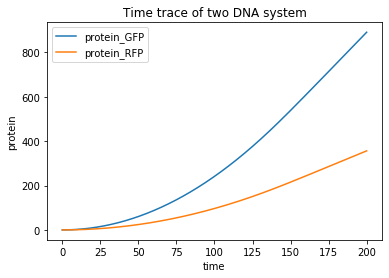

In [2]:
#here we are plotting the network diagram and simulating the system with some basic parameters

try:
    from bokeh.models import (Plot , Range1d)
    import bokeh.plotting
    import bokeh.io
    bokeh.io.output_notebook() #this makes the graph appear in line with the notebook
    colordict={"complex":"cyan","protein":"green",
                "GFP":"lightgreen",
                "RFP":"red",
                "ribosome":"blue",
                "dna":"white","rna":"orange",
                "ligand":"pink","phosphate":"yellow","nothing":"purple"}
    layout_str = "force"
    #print("one construct")
    DG, DGspec, DGrxn = generate_networkx_graph(myCRN,use_pretty_print=False,colordict=colordict) #this creates the networkx objects
    plot = Plot(plot_width=500, plot_height=500, x_range=Range1d(-500, 500), y_range=Range1d(-500, 500)) #this generates a 
    graphPlot(DG,DGspec,DGrxn,plot,layout=layout_str,posscale=1) #now you draw the network on the plot. Layout "force" is 
    bokeh.io.show(plot) #if you don't type this the plot won't show

    print(myCRN)
    ''
    timepoints = np.linspace(0, 200, 1000)
    x0 = {"dna_pconst_UTR1_GFP_t16":5.0,
    "dna_t16_r_RFP_r_UTR1_r_pconst_r":2.0, "protein_RNAP":10., "protein_Ribo":50.,}
    Re1 = myCRN.simulate_with_bioscrape(timepoints, initial_condition_dict = x0)
    plt.plot(timepoints,Re1["protein_GFP"], label = "protein_GFP")
    plt.plot(timepoints,Re1["protein_RFP"], label = "protein_RFP")
    #plt.plot(timepoints,Re1["rna_mydna"], label = "rna_mydna")
    #plt.gca().set_yscale("log")
    plt.title("Time trace of two DNA system")
    plt.xlabel("time")
    plt.ylabel("protein")
    plt.legend()
    #'''
except ModuleNotFoundError:
    pass

That seems pretty straightforward but now let's see what happens if we put both on the same piece of DNA:



dna = pconst_UTR1_GFP_t16_t16_r_RFP_r_UTR1_r_pconst_r
	pconst_0
	rna = UTR1_GFP_t16
	UTR1_0
	protein = GFP_1
	pconst_7_r
	rna = UTR1_RFP_t16
	UTR1_0
	protein = RFP_1


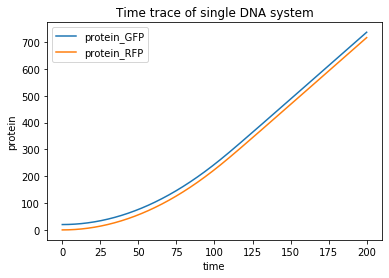

In [3]:
construct_3 = DNA_construct([[pconst,"forward"],[utr1,"forward"],[gfp,"forward"],[t16,"forward"],[t16,"reverse"],[rfp,"reverse"],[utr1,"reverse"],[pconst,"reverse"]])
#now, we are using dnaplotlib to plot the constructs

if(dpl_enabled):
    plotConstruct(construct_3,debug=False,plot_rnas=True)
print(construct_3)

#some very basic parameters are defined
parameters={"cooperativity":2,"kb":100, "ku":10, "ktx":.05, "ktl":.2, "kdeg":2,"kint":.05}

components = [construct_3]
myMixture = TxTlExtract(name = "txtl", parameters = parameters, components = components, parameter_warnings = False)
myCRN = myMixture.compile_crn()
try:
    timepoints = np.linspace(0, 200, 1000)
    x0 = {"dna_pconst_UTR1_GFP_t16_t16_r_RFP_r_UTR1_r_pconst_r":5.0, "protein_GFP":20,"protein_RNAP":10., "protein_Ribo":50.,}
    #I started the GFP at a slightly elevated value so you can see the two lines on top of each other in the graph
    Re1 = myCRN.simulate_with_bioscrape(timepoints, initial_condition_dict = x0)
    plt.plot(timepoints,Re1["protein_GFP"], label = "protein_GFP")
    plt.plot(timepoints,Re1["protein_RFP"], label = "protein_RFP")
    #plt.plot(timepoints,Re1["rna_mydna"], label = "rna_mydna")
    #plt.gca().set_yscale("log")
    plt.title("Time trace of single DNA system")
    plt.xlabel("time")
    plt.ylabel("protein")
    plt.legend()
    #'''
except ModuleNotFoundError:
    pass


The same RNAs and proteins are made, but the network diagram should be a bit more complicated, owing to the combinatorial binding to the DNA molecule

In [4]:
try:
    from bokeh.models import (Plot , Range1d)
    import bokeh.plotting
    import bokeh.io
    bokeh.io.output_notebook() #this makes the graph appear in line with the notebook
    colordict={"complex":"cyan","protein":"green",
                "GFP":"lightgreen",
                "RFP":"red",
                "ribosome":"blue",
                "dna":"white","rna":"orange",
                "ligand":"pink","phosphate":"yellow","nothing":"purple"}
    layout_str = "force"
    #print("one construct")
    DG, DGspec, DGrxn = generate_networkx_graph(myCRN,use_pretty_print=False,colordict=colordict) #this creates the networkx objects
    plot = Plot(plot_width=500, plot_height=500, x_range=Range1d(-500, 500), y_range=Range1d(-500, 500)) #this generates a 
    graphPlot(DG,DGspec,DGrxn,plot,layout=layout_str,posscale=1) #now you draw the network on the plot. Layout "force" is 
    bokeh.io.show(plot) #if you don't type this the plot won't show
except ModuleNotFoundError:
    pass

Loading BokehJS ...

D:\anaconda3\lib\site-packages\bokeh\models\graphs.py:164: UserWarning: Node keys in 'layout_function' don't match node keys in the graph. These nodes may not be displayed correctly.
  warn("Node keys in 'layout_function' don't match node keys in the graph. "


Now you can see that two arrows lead to each RNA. But there is still only one promoter per RNA, how can it be? Well, now that both promoters and transcripts are on the same DNA, we must take into account the fact that you can have both promoters with RNA polymerase bound, so for example Promoter1 can lead to RNA1 whether or not Promoter2 is bound by RNAP.

We can even make a more complicated DNA construct, such as what happens before and after a promoter is "flipped" by integrase activity

In [5]:
attB = AttachmentSite("attB","attB",integrase="Bxb1")
attP = AttachmentSite("attP","attP",integrase="Bxb1")
attL = AttachmentSite("attL","attL",integrase="Bxb1")
attR = AttachmentSite("attR","attR",integrase="Bxb1")


construct_1 = DNA_construct([[t16,"reverse"],[rfp,"reverse"],[utr1,"reverse"],[attP,"forward"],[pconst,"forward"],[attB,"reverse"],[utr1,"forward"],[gfp,"forward"],[t16,"forward"]])
construct_2 = DNA_construct([[t16,"reverse"],[rfp,"reverse"],[utr1,"reverse"],[attR,"forward"],[pconst,"reverse"],[attL,"reverse"],[utr1,"forward"],[gfp,"forward"],[t16,"forward"]])
#now, we are using dnaplotlib to plot the constructs

if(dpl_enabled):
    plotConstruct(construct_1,debug=False,plot_rnas=True)
    plotConstruct(construct_2,debug=False,plot_rnas=True)
print(construct_1)
print(construct_2)

#some very basic parameters are defined
parameters={"cooperativity":2,"kb":100, "ku":10, "ktx":.05, "ktl":.2, "kdeg":2,"kint":.05}

components = [construct_1,construct_2]
myMixture = TxTlExtract(name = "txtl", parameters = parameters, components = components, parameter_warnings = False)
myCRN = myMixture.compile_crn()

dna = t16_r_RFP_r_UTR1_r_attP_pconst_attB_r_UTR1_GFP_t16
	pconst_4
	rna = attB_r_UTR1_GFP_t16
	UTR1_1
	protein = GFP_2
dna = t16_r_RFP_r_UTR1_r_attR_pconst_r_attL_r_UTR1_GFP_t16
	pconst_4_r
	rna = attR_r_UTR1_RFP_t16
	UTR1_1
	protein = RFP_2


And we can see that this construct 'knows' that a forward facing promoter will not produce RNAs that face the reverse direction.

In [6]:
try:
    from bokeh.models import (Plot , Range1d)
    import bokeh.plotting
    import bokeh.io
    bokeh.io.output_notebook() #this makes the graph appear in line with the notebook
    colordict={"complex":"cyan","protein":"green",
                "GFP":"lightgreen",
                "RFP":"red",
                "ribosome":"blue",
                "dna":"white","rna":"orange",
                "ligand":"pink","phosphate":"yellow","nothing":"purple"}
    layout_str = "force"
    #print("one construct")
    DG, DGspec, DGrxn = generate_networkx_graph(myCRN,use_pretty_print=False,colordict=colordict) #this creates the networkx objects
    plot = Plot(plot_width=500, plot_height=500, x_range=Range1d(-500, 500), y_range=Range1d(-500, 500)) #this generates a 
    graphPlot(DG,DGspec,DGrxn,plot,layout=layout_str,posscale=1) #now you draw the network on the plot. Layout "force" is 
    bokeh.io.show(plot) #if you don't type this the plot won't show
except ModuleNotFoundError:
    pass

Loading BokehJS ...

D:\anaconda3\lib\site-packages\bokeh\models\graphs.py:164: UserWarning: Node keys in 'layout_function' don't match node keys in the graph. These nodes may not be displayed correctly.
  warn("Node keys in 'layout_function' don't match node keys in the graph. "
